In [1]:
import json
import itertools
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

fname = '../data/theses_dump_21-03-2017.json'

class DataFrameLoader(object):
    
    def __init__(self,
                 keys=['keywords', 'year', 'collections'],
                 years=range(2010, 2016)):
        self.keys = keys
        self.years = years
        
    def project(self, thesis):
        ''' Generates all the combinations of values from keys in a dictionary

        Arguments:
            thesis (dictionary): values are lists
            keys (list of strings): keys of the dictionary

        Returns:
            dictionary
        '''
        values = [thesis[key] for key in self.keys]
        for combination in itertools.product(*values):
            yield dict(zip(self.keys, combination))


    def match(self, thesis):
        try:
            if self.years and int(thesis['year']) in self.years:
                return True
        except Exception as err:
            print err
            return False

    def collect(self, fp):
        for line in fp:
            thesis = json.loads(line)
            for p in self.project(thesis):
                if self.match(p):
                    yield p


In [2]:
with open(fname) as fp:
    loader = DataFrameLoader()
    data = loader.collect(fp)
    df = pd.DataFrame(data)

invalid literal for int() with base 10: '2009,2010'
invalid literal for int() with base 10: '2009,2010'
invalid literal for int() with base 10: '2009,2010'
invalid literal for int() with base 10: '2009,2010'
invalid literal for int() with base 10: '2009,2010'
invalid literal for int() with base 10: '2009,2010'
invalid literal for int() with base 10: '2009,2010'
invalid literal for int() with base 10: '2009,2010'
invalid literal for int() with base 10: '2009,2010'
invalid literal for int() with base 10: '2009,2010'
invalid literal for int() with base 10: '[2006]'
invalid literal for int() with base 10: '[2006]'
invalid literal for int() with base 10: '[2006]'
invalid literal for int() with base 10: '[2006]'
invalid literal for int() with base 10: '[2006]'
invalid literal for int() with base 10: '[2006]'
invalid literal for int() with base 10: '[2008]'
invalid literal for int() with base 10: '[2008]'
invalid literal for int() with base 10: '[2008]'
invalid literal for int() with base 10:

In [3]:
df.shape

(717183, 3)

In [4]:
df.head(20)

,collections,keywords,year
0,com_10024_12,Yhteistoimintamenettely,2010
1,col_10024_268,Yhteistoimintamenettely,2010
2,com_10024_12,uudelleensijoittamisvelvollisuus,2010
3,col_10024_268,uudelleensijoittamisvelvollisuus,2010
4,com_10024_12,takaisinottovelvollisuus,2010
5,col_10024_268,takaisinottovelvollisuus,2010
6,com_10024_12,yhteistoimintalaki,2010
7,col_10024_268,yhteistoimintalaki,2010
8,com_10024_12,työsopimuslaki,2010
9,col_10024_268,työsopimuslaki,2010


In [5]:
frequencies = df.groupby(['collections', 'keywords', 'year']).size()

In [6]:
frequencies.size

591711

In [7]:
frequencies

collections      keywords              year
col_10024_100    CDSMP                 2015    1
                 Delfoi                2010    1
                                       2011    2
                 Delfoimenetelmä       2013    1
                 Delfoi® -menetelmä    2013    1
                 Lääkitysturvallisuus  2010    1
                 Medication safety     2010    1
                 RAFAELA               2011    1
                 TETRA                 2013    1
                 VIRVE                 2013    1
                 aivokasvain           2011    1
                 akuuttihoito          2015    1
                 alkoholi              2013    1
                 alkoholinkäyttö       2014    1
                 ambulanssityhjiö      2010    1
                 development project   2010    1
                 diabetes              2012    1
                 dokumentering         2011    1
                 ehkäisevä päihdetyö   2013    1
                 elämänha

In [15]:
pivot = df.pivot_table(index='keywords', columns='year', aggfunc=len, fill_value=0)

In [42]:
frequency = pivot[pivot.sum(axis=1) > 100]

In [43]:
frequency

collections                               identifier  \
year                          2010 2011 2012 2013 2014 2015 2016       2010   
keywords                                                                      
                                30  126   22   12    0    6    0         30   
.NET                             6    8   16   24   10    4    0          6   
3D                              26   26   60   48   56   72    0         26   
3D-mallinnus                    22   30   34   48   40   80    2         22   
3D-tulostus                      0    6    0    8   28   22    2          0   
3G                               8   14   10    6   14    8    0          8   
3d                              10   10    6   10   16   14    0         10   
5S                               2   16   20   30   24   24    2          2   
ABC-analyysi                     4   10   16   20   12   16    0          4   
ADHD                            10   12    8    8   12   22    0         10   
ASP.NET                          8   12   10   14   16   20    0          8   
Active Directory                 6   12   12    6   10   10    0          6   
Ajax                             6   24   10   12   16    2    0          6   
Android                          6   32   56   92   80  106    4          6   
Arduino                          2    4   20   20   32   22    0          2   
Asiakaslähtöisyys               16   16   14   18   28   22    0         16   
Asiakaspalvelu                  22    8   24   10   18   12    2         22   
Asiakastyytyväisyys             52   62   52   74   56   58    2         52   
Automaatio                      18   12   14   10   12   12    0         18   
B2B                              4    6    6   26   32   46    4          4   
BIM                              0   12   14   14   14   34    2          0   
Balanced Scorecard               6   24   12    8   14   14    4          6   
Benchmarking                     6   12   10   12   16   18    4          6   
Blender                          6    0    8   10   10   22    0          6   
Bluetooth                       12   18   14   14   14   20    4         12   
Branding                         8    0    8   14   16   20    0          8   
Business plan                    2    6   12   14   10   26    0          2   
C#                              34   34   30   68   56   52    0         34   
C++                             12   14    8   20   14   10    0         12   
CE-merkintä                     16    6   20   42   54   40    0         16   
...                            ...  ...  ...  ...  ...  ...  ...        ...   
ympäristöjohtaminen             10   12    4   12    2   12    0         10   
ympäristöjärjestelmä            14   10   22   14   12    6    0         14   
ympäristökasvatus               12   14   32   24   18   30    2         12   
ympäristövaikutukset            18   18   14   12   12    8    0         18   
ympäristövastuu                 16   12    4   24   16   18    0         16   
ympäristöystävällisyys          14    8    6   18   10    6    0         14   
yrittäjyys                      86  106  158  124  120  136    0         86   
yrittäjyyskasvatus              12    8   10   10    6    8    0         12   
yrittäjä                        10   18   20   16   20   24    2         10   
yrityksen perustaminen          28   34   40   30   48   40    2         28   
yritykset                       28   22   18   18   14   10    0         28   
yritys                          14   18   26   16   34   22    0         14   
yritysilme                      26   28   16   10   26   16    0         26   
yrityskulttuuri                  8    2   14   16   14   18    0          8   
yrityskuva                      48   46   32   58   28   30    0         48   
yritysmarkkinointi              14   14   14    8   10   12    2         14   
yritysmuodot                     4    8   16   18   28    6    0         

## Clustering trend lines

In [8]:
model = KMeans(10)
model.fit(frequency.values)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [9]:
model

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [10]:
model.labels_

array([8, 4, 4, 4, 0, 4, 8, 8, 5, 4, 8, 4, 8, 8, 4, 4, 8, 8, 8, 0, 5, 4, 8,
       4, 8, 8, 8, 8, 5, 8, 8, 4, 4, 7, 7, 3, 8, 8, 8, 8, 4, 4, 5, 8, 8, 8,
       8, 0, 4, 8, 8, 4, 0, 4, 8, 0, 2, 4, 5, 4, 5, 0, 5, 8, 0, 0, 4, 8, 4,
       8, 0, 4, 8, 8, 7, 8, 7, 4, 8, 0, 9, 4, 8, 0, 8, 0, 4, 8, 8, 7, 2, 8,
       8, 9, 3, 8, 8, 9, 5, 8, 8, 0, 8, 4, 4, 8, 8, 8, 0, 4, 8, 4, 9, 4, 8,
       8, 9, 0, 0, 5, 8, 9, 4, 0, 1, 9, 4, 7, 2, 8, 8, 0, 5, 0, 8, 1, 8, 2,
       5, 4, 7, 4, 4, 5, 2, 5, 4, 8, 0, 8, 0, 8, 0, 8, 5, 8, 3, 5, 7, 8, 0,
       4, 8, 5, 8, 8, 8, 8, 8, 4, 0, 5, 2, 8, 8, 8, 0, 0, 5, 4, 8, 8, 1, 0,
       0, 0, 8, 7, 0, 2, 4, 8, 8, 4, 5, 4, 8, 8, 2, 0, 4, 8, 4, 8, 6, 0, 8,
       8, 9, 2, 9, 8, 0, 8, 7, 5, 5, 5, 5, 5, 8, 5, 4, 8, 8, 5, 0, 0, 9, 8,
       0, 4, 4, 4, 4, 9, 4, 4, 8, 4, 4, 0, 8, 0, 8, 8, 0, 8, 0, 8, 8, 4, 6,
       8, 8, 8, 4, 5, 7, 4, 9, 4, 8, 4, 4, 0, 4, 4, 8, 8, 8, 8, 9, 7, 4, 0,
       4, 8, 0, 8, 8, 5, 8, 8, 8, 8, 2, 8, 0, 9, 8, 0, 4, 8, 8, 8, 8, 2, 5,
       8, 9,

/home/ari/.virtualenvs/analysis/local/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type int64, converted to float to avoid overflows
  X = self._check_test_data(X)


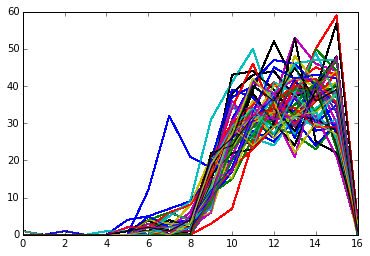

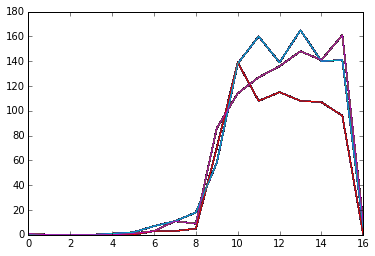

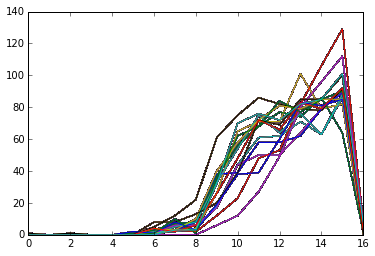

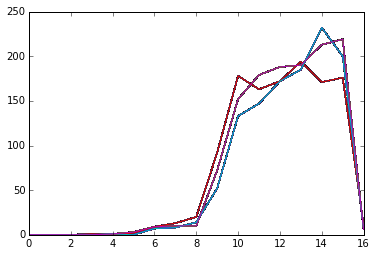

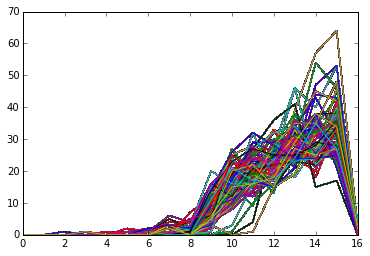

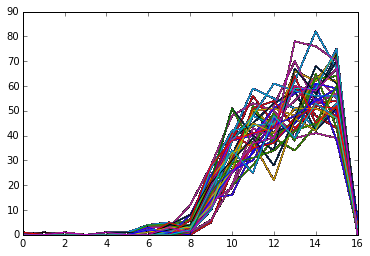

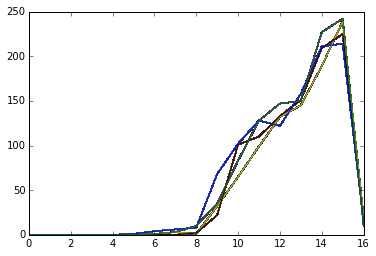

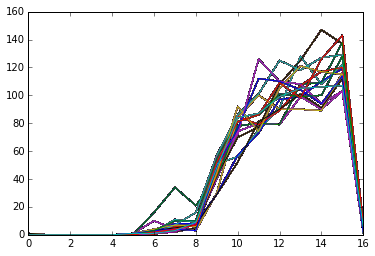

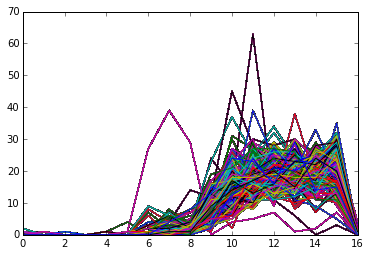

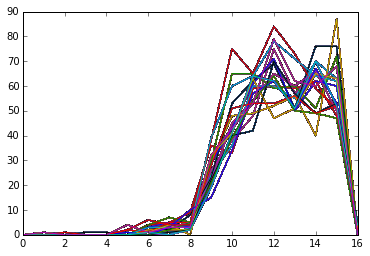

In [11]:
for label in model.labels_:
    for keyword, counts in frequency.iterrows():
        label = model.predict(counts.values)[0]
        # Create plot for each label
        plt.figure(label)
        plt.plot(counts.values)

## Computing trends

In [9]:
frequency_change = frequency.diff(1, axis=1)

In [10]:
frequency_change

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
keyword,,,,,,,,,,,,,,,,,
,NaN,0,0,0,0,0,1,-1,1,23,-9,48,-52,-5,-6,3,-3
3D,NaN,0,0,0,0,0,0,0,1,6,6,0,17,-6,4,8,-36
3D-mallinnus,NaN,0,0,0,0,0,0,0,0,2,9,4,2,7,-4,20,-39
Android,NaN,0,0,0,0,0,0,0,1,-1,3,13,12,18,-6,13,-51
Asiakastyytyväisyys,NaN,0,0,0,0,4,1,2,2,7,10,5,-5,11,-9,1,-28
C#,NaN,0,0,0,0,0,0,0,2,0,15,0,-2,19,-6,-2,-26
CRM,NaN,0,0,0,0,0,0,1,0,3,4,5,4,8,-6,-1,-18
ERP,NaN,0,0,0,0,0,0,0,1,4,18,-3,4,-4,5,-8,-17
Facebook,NaN,0,0,0,0,0,0,0,0,5,21,9,10,-3,11,1,-52


In [11]:
# Topics with highest frequency increase from previous year
frequency_change.idxmax(axis=0)

year
2000                    NaN
2001        kestävä kehitys
2002               Internet
2003    asiakastyytyväisyys
2004                  imago
2005    Asiakastyytyväisyys
2006     kehittämisprojekti
2007    haastattelututkimus
2008                 lapset
2009                 nuoret
2010    asiakastyytyväisyys
2011                 ohjaus
2012             osallisuus
2013    potilasturvallisuus
2014        varhaiskasvatus
2015             osallisuus
2016                       
dtype: object

In [12]:
# Topics with highest frequency decrease from previous year
frequency_change.idxmin(axis=0)

year
2000                         NaN
2001            markkinatutkimus
2002             kestävä kehitys
2003                    Internet
2004         asiakastyytyväisyys
2005                kehittäminen
2006                   mielikuva
2007              asiakaspalvelu
2008              kyselytutkimus
2009          kehittämisprojekti
2010                            
2011    kvalitatiivinen tutkimus
2012                            
2013                   kuntoutus
2014                    päihteet
2015                kehittäminen
2016             varhaiskasvatus
dtype: object

In [13]:
frequency_change_ratio = frequency_change / frequency

In [14]:
frequency_change_ratio

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
keyword,,,,,,,,,,,,,,,,,
,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-inf,1.000000,0.958333,-0.600000,0.761905,-4.727273,-0.833333,-inf,1.000000,-inf
3D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.857143,0.461538,0.000000,0.566667,-0.250000,0.142857,0.222222,-inf
3D-mallinnus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.818182,0.266667,0.117647,0.291667,-0.200000,0.500000,-39.000000
Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-inf,1.000000,0.812500,0.428571,0.391304,-0.150000,0.245283,-25.500000
Asiakastyytyväisyys,NaN,NaN,NaN,NaN,NaN,1.000000,0.200000,0.285714,0.222222,0.437500,0.384615,0.161290,-0.192308,0.297297,-0.321429,0.034483,-28.000000
C#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.882353,0.000000,-0.133333,0.558824,-0.214286,-0.076923,-inf
CRM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.750000,0.500000,0.384615,0.235294,0.320000,-0.315789,-0.055556,-inf
ERP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.800000,0.782609,-0.150000,0.166667,-0.200000,0.200000,-0.470588,-inf
Facebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.807692,0.257143,0.222222,-0.071429,0.207547,0.018519,-26.000000


In [15]:
# Highest relative changes
frequency_change_ratio.idxmax(axis=0)

year
2000                    NaN
2001        kestävä kehitys
2002               Internet
2003    asiakastyytyväisyys
2004                  imago
2005    Asiakastyytyväisyys
2006                       
2007                    CRM
2008                       
2009           3D-mallinnus
2010                Android
2011                  HTML5
2012         asiakaskokemus
2013          toimintamalli
2014           benchmarking
2015                       
2016                palaute
dtype: object

# Trending topics by collection

In [ ]:
def filter_thesis(collection)

## Pandas bug reproduction group by

In [65]:
df_test = pd.DataFrame([{'a': '', 'b': 1}]*100)

In [66]:
df_test

,a,b
0,,1
1,,1
2,,1
3,,1
4,,1
5,,1
6,,1
7,,1
8,,1
9,,1


In [67]:
df_test.columns

Index([u'a', u'b'], dtype='object')

In [68]:
df_test.groupby(['a', 'b']).size()

a  b
   1    100
dtype: int64

In [ ]:
w